# Diagnosis of Diabetes

Information about dataset attributes

- Pregnancies: To express the Number of pregnancies
- Glucose: To express the Diastolic Glucose level in blood 
- BloodPressure: To express the Blood pressure measurement (mm Hg)
- SkinThickness: To express the thickness of the skin (mm)
- Insulin: To express the Insulin level in blood
- BMI: To express the Body mass index
- DiabetesPedigreeFunction: To express the Diabetes percentage
- Age: To express the age
- Outcome: To express the final result diagnoses 1 is Yes and 0 is No

# Objective

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. 

**The objective** of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset.

# Exploratory Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import brier_score_loss

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [37]:
#duplicate data
df.duplicated().sum()

0

In [38]:
#check missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
#Total unique each variable
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [40]:
#Data description
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

- It is not realistic for someone to have a glucose, blood pressure, SkinThickness, Insulin	and BMI value of zero (0)

<Axes: xlabel='count', ylabel='Outcome'>

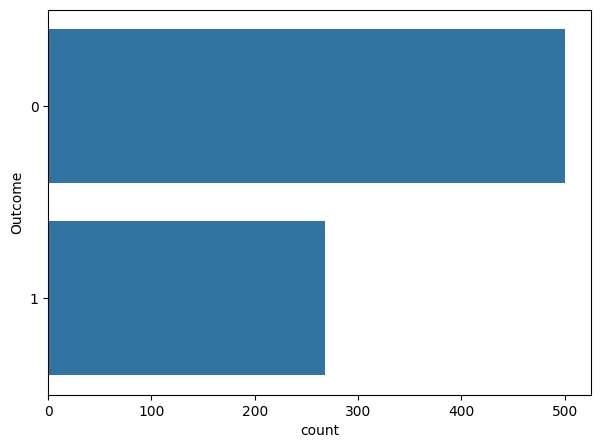

In [10]:
plt.figure(figsize = (7, 5))
sns.countplot(y="Outcome", data=df)

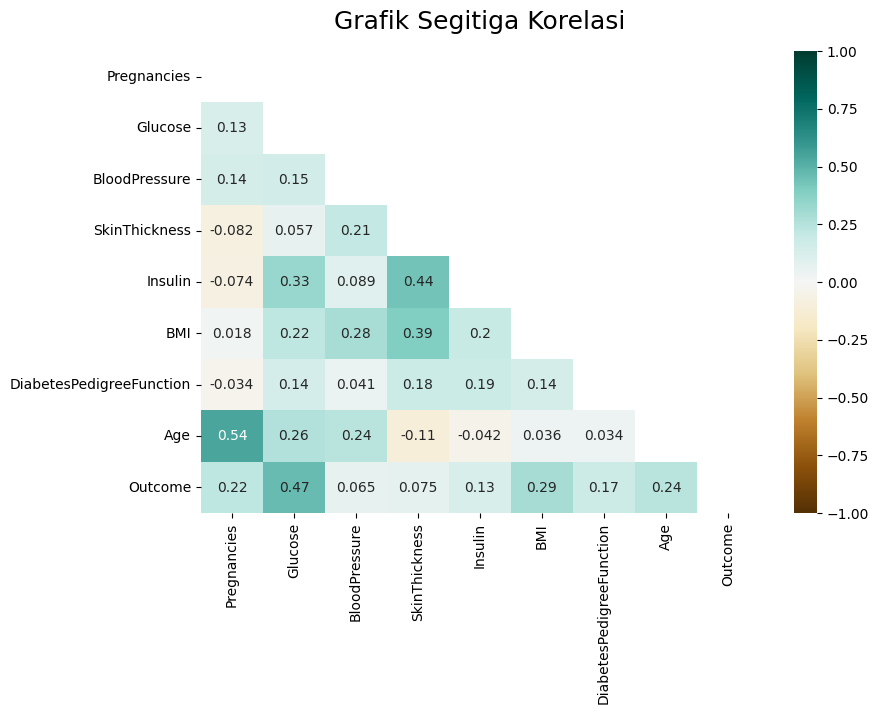

In [11]:
#Check Correlation
plt.figure(figsize=(9, 6))
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Grafik Segitiga Korelasi', fontdict={'fontsize':18}, pad=16);

Based on correlation results:
- Age and pregnancies = 0.54
- Glucose and Outcome = 0.47

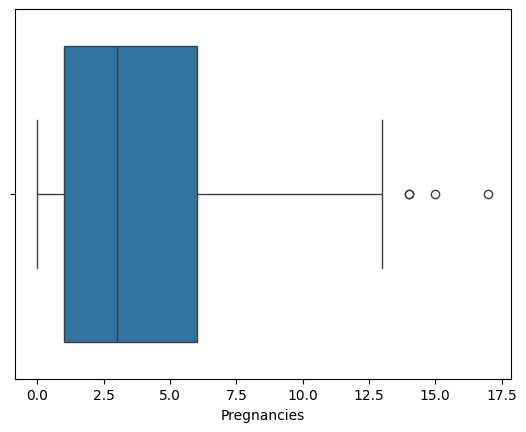

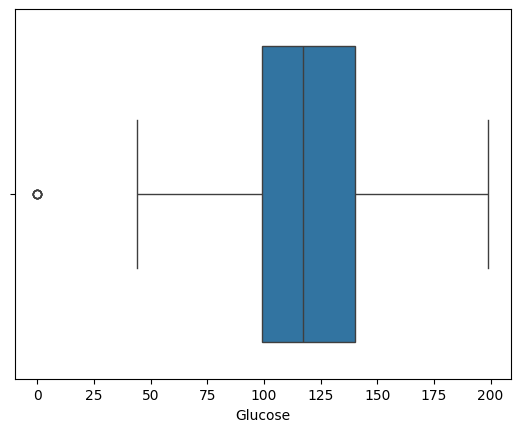

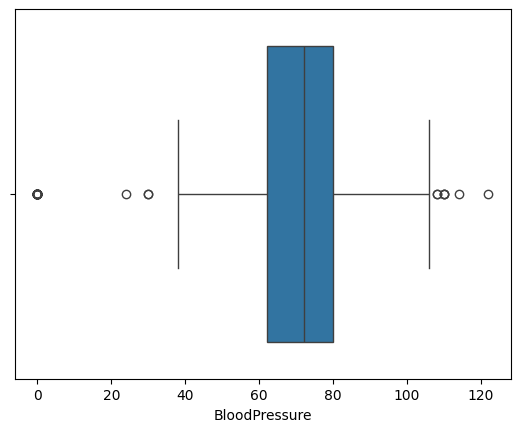

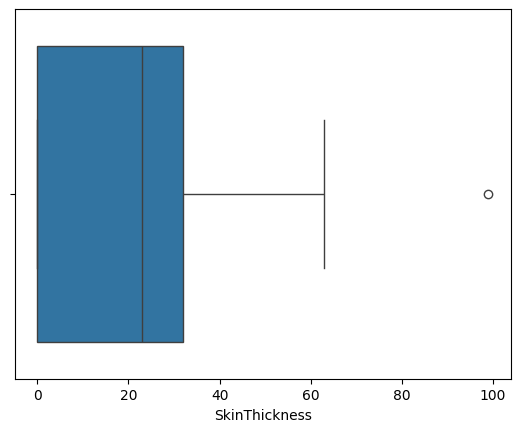

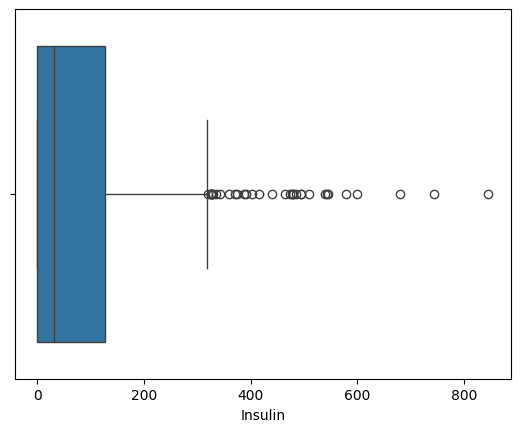

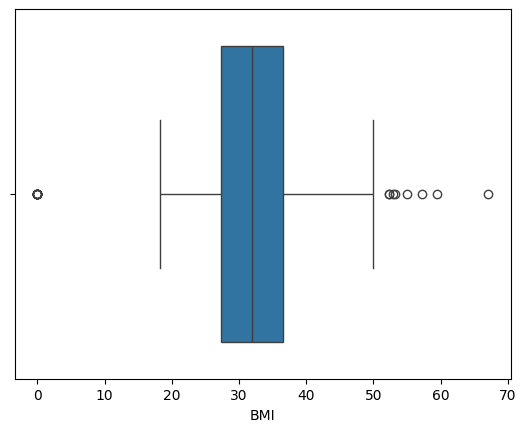

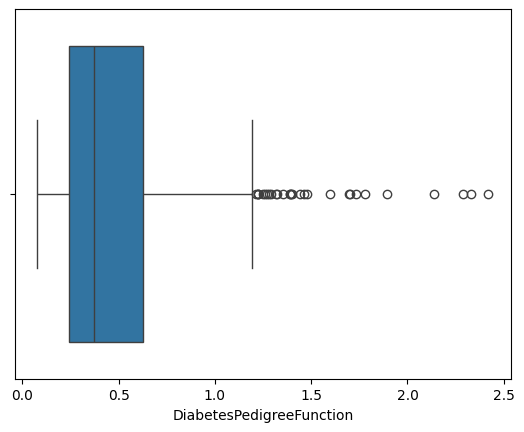

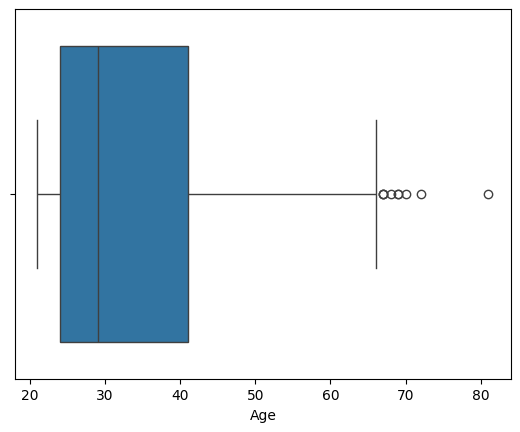

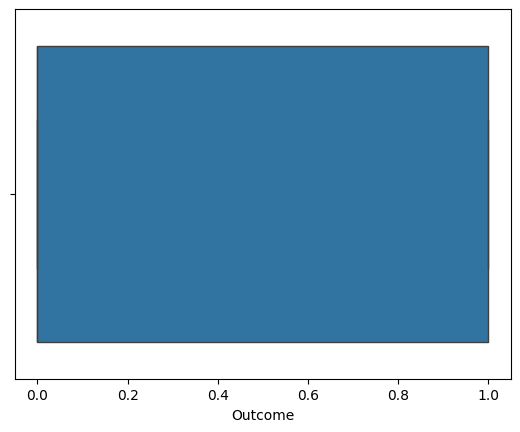

In [12]:
#Check outliers
for c in df.columns:
    plt.figure()
    sns.boxplot(x = c, data = df, orient = "v")

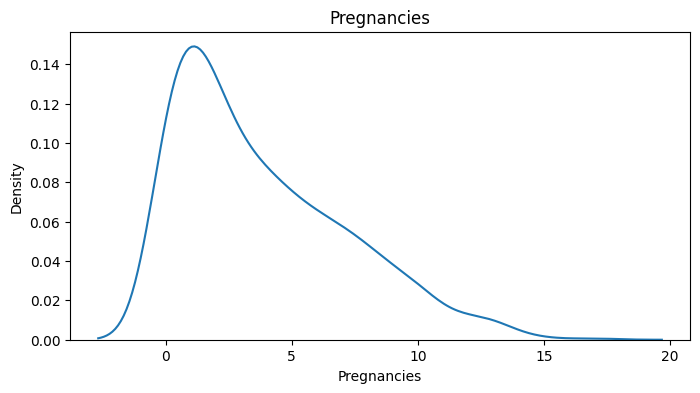

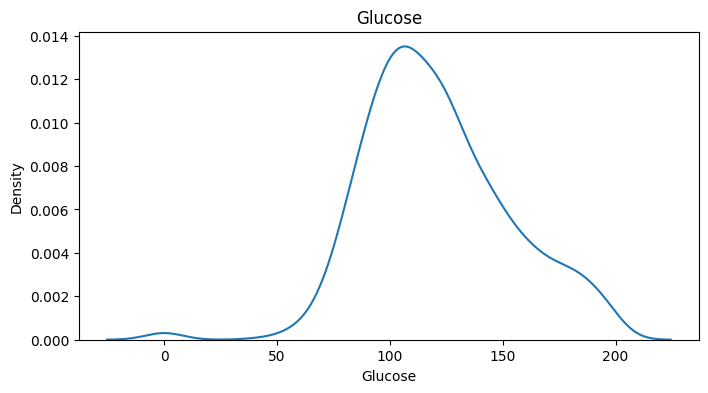

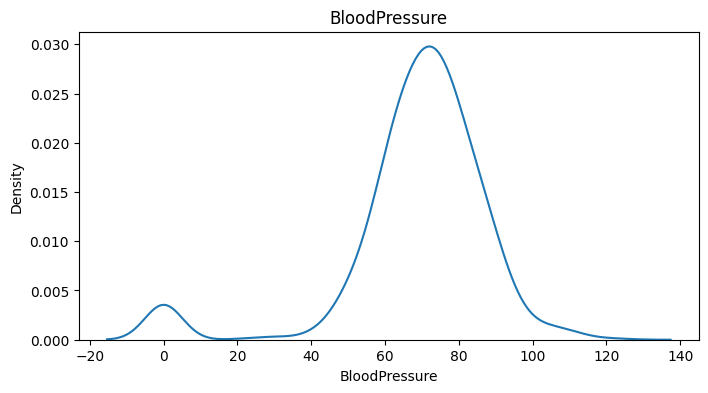

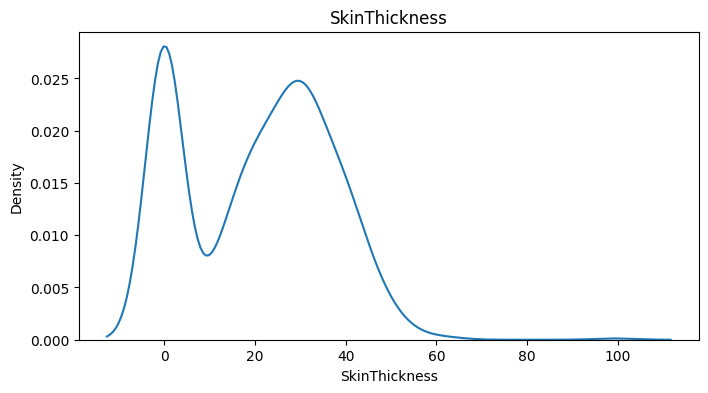

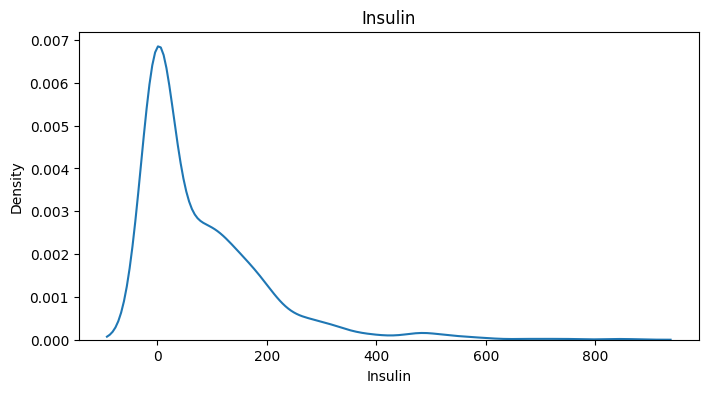

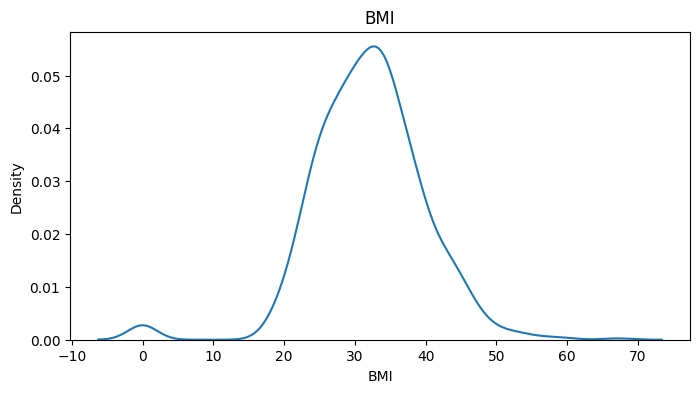

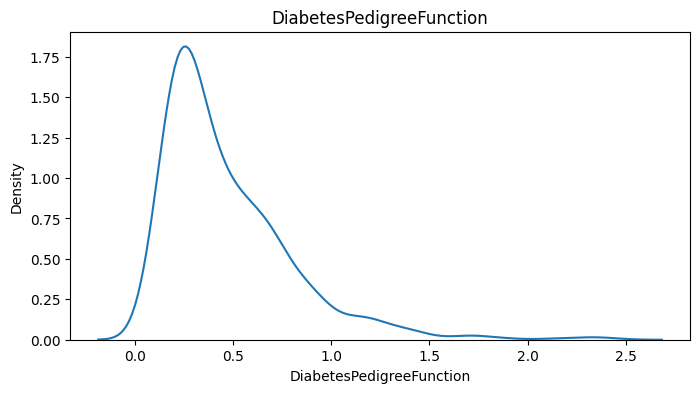

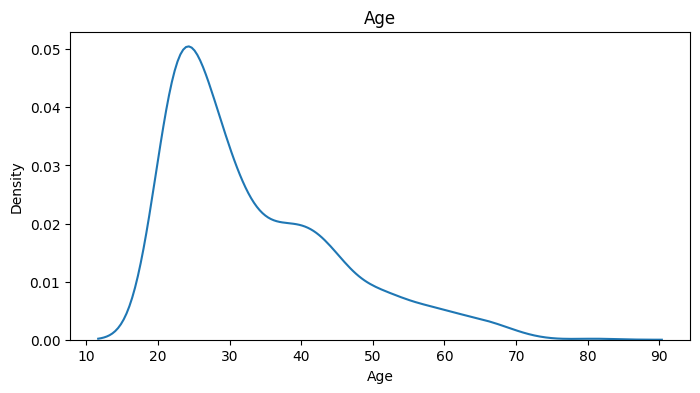

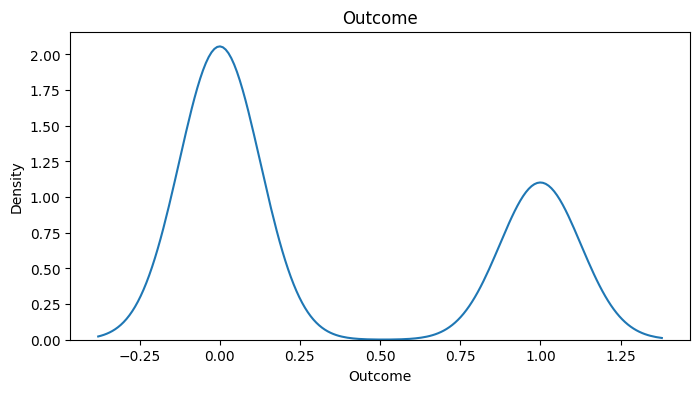

In [13]:
#Check data distribution
for i in df:
    plt.figure(figsize=(8,4))
    sns.kdeplot(x=i, data=df)
    plt.title(i)

Almost all columns have not normal distribution and have outliers

## Data Cleaning

- SkinThickness dan Insulin value of zero direplace median
- glucose, BMI, blood pressure removed

In [4]:
#Copy data frame
df_clean = df.copy()

In [5]:
column_zero = ["SkinThickness", "Insulin"]

#replace nan (missing values)
for i in column_zero:
    df_clean[i] = df_clean[i].replace(0, np.nan)

In [6]:
for i in column_zero:
    df_clean[i].fillna(df_clean[i].median(), inplace=True)

In [7]:
df_clean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df_clean = df_clean.drop(df[df["Glucose"] == 0].index).reset_index(drop=True)
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,125.0,33.6,0.627,50,1
1,1,85,66,29.0,125.0,26.6,0.351,31,0
2,8,183,64,29.0,125.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
758,10,101,76,48.0,180.0,32.9,0.171,63,0
759,2,122,70,27.0,125.0,36.8,0.340,27,0
760,5,121,72,23.0,112.0,26.2,0.245,30,0
761,1,126,60,29.0,125.0,30.1,0.349,47,1


In [9]:
df_clean = df_clean.drop(df_clean[df_clean["BloodPressure"] == 0].index).reset_index(drop=True)
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,125.0,33.6,0.627,50,1
1,1,85,66,29.0,125.0,26.6,0.351,31,0
2,8,183,64,29.0,125.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [10]:
df_clean = df_clean.drop(df_clean[df_clean["BMI"] == 0].index).reset_index(drop=True)
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,125.0,33.6,0.627,50,1
1,1,85,66,29.0,125.0,26.6,0.351,31,0
2,8,183,64,29.0,125.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [11]:
df_clean.shape

(724, 9)

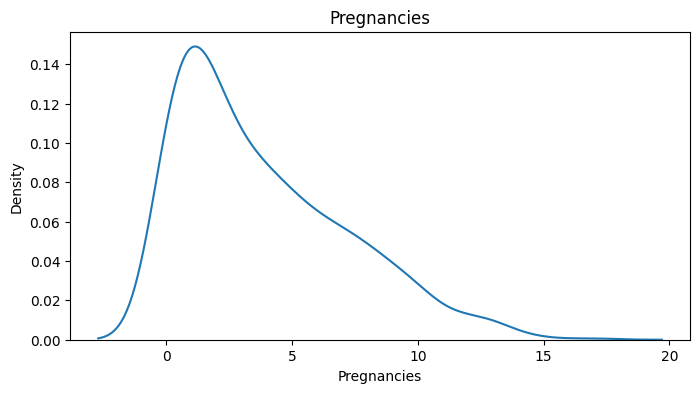

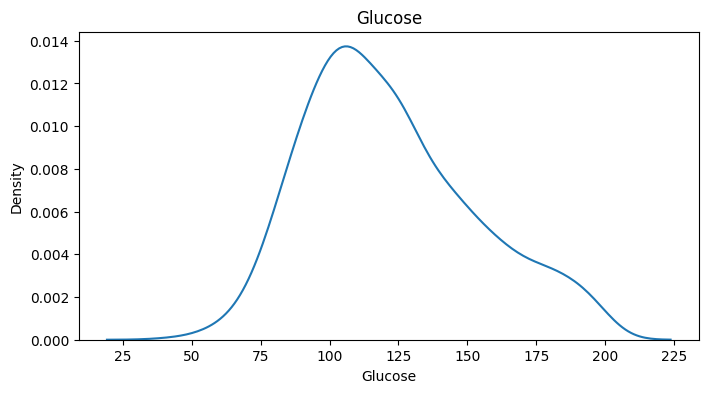

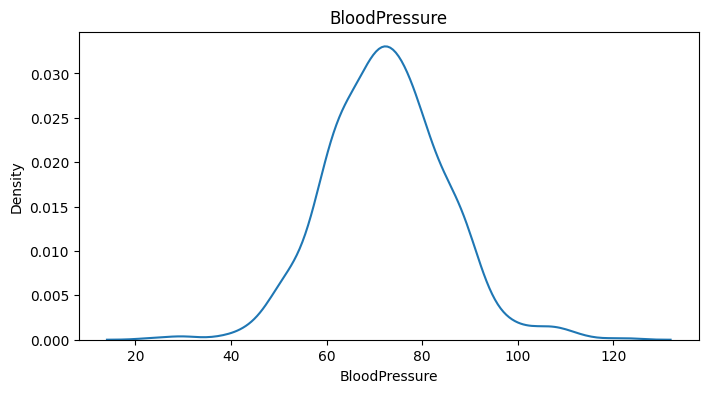

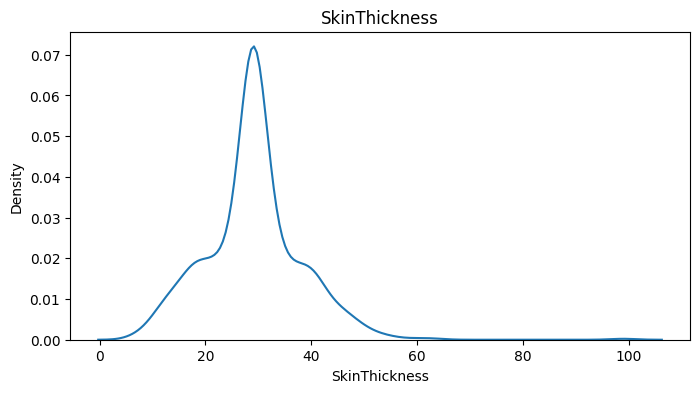

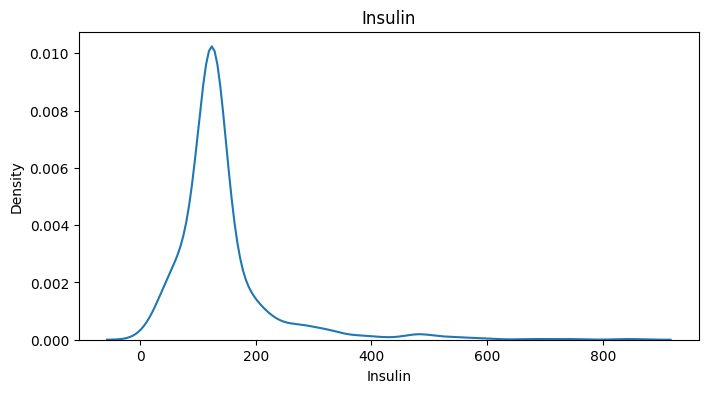

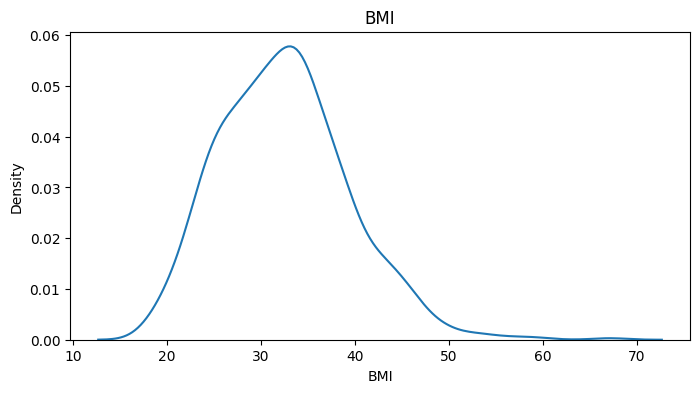

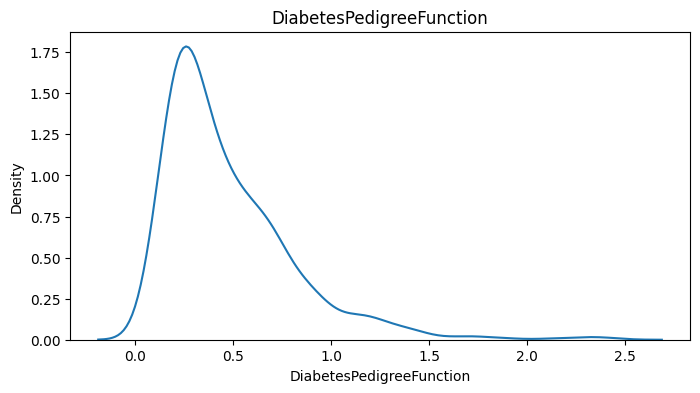

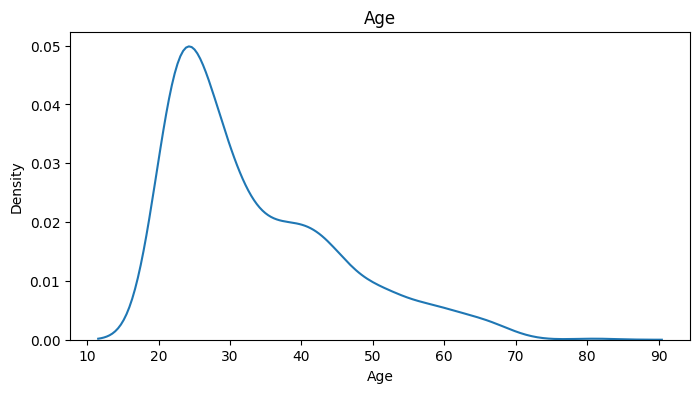

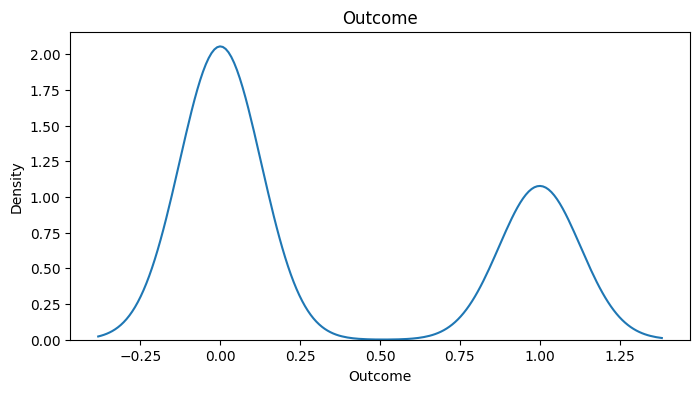

In [17]:
for i in df_clean:
    plt.figure(figsize=(8,4))
    sns.kdeplot(x=i, data=df_clean)
    plt.title(i)

In [28]:
df_clean.to_csv("Diabetes_cleaning.csv", index=False)

## Train Test Split

In [12]:
X = df_clean.drop('Outcome', axis=1).copy()
y = df_clean['Outcome'].copy()

In [13]:
#create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(543, 8)
(181, 8)


In [15]:
y_train.value_counts()

Outcome
0    349
1    194
Name: count, dtype: int64

In [16]:
#Scaling data/normalisasi
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    scaler.fit_transform(X_test),
    columns=X_test.columns
)

display(X_train_scaled.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.228717,-0.755137,0.909584,-0.048240,-0.202200,0.401607,-0.264276,1.468950
1,-0.257899,-0.294751,-1.771249,-2.096355,-0.647750,-0.453921,0.445908,-0.723091
2,0.336747,-0.228982,2.013456,-0.048240,-0.202200,2.939192,-0.798406,-0.460046
3,-0.257899,-1.248407,-0.036592,0.275147,-0.202200,0.662616,-0.625336,-0.460046
4,0.039424,0.034096,0.594192,-1.557378,0.365876,-0.091409,-0.100158,0.066044


# Modelling and Evaluation

#### Metric evaluation 
- **Brier score** is an evaluation metric that is used to check the goodness of a predicted probability score. This is very similar to the mean squared error, but only applied for prediction probability scores, whose values range between 0 and 1. (https://www.machinelearningplus.com/statistics/brier-score/)
- **Accuracy Score**. Accuracy simply measures how often the classifier correctly predicts.
- **Precision**. 
It explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives
- **Recall (Sensitivity)**.  It explains how many of the actual positive cases we were able to predict correctly with our model. Recall is a useful metric in cases where False Negative is of higher concern than False Positive.

https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/ 


#### function for modelling

In [18]:
def model_assess(model, x_train, y_train, x_test, y_test, name='Default'):
    model.fit(x_train, y_train)
    preds_train = model.predict(x_train)
    print('                   ', name, '\n',
    classification_report(y_train, preds_train))
    # Confusion Matrix untuk train set
    cm_train = confusion_matrix(y_train, preds_train)
    ConfusionMatrixDisplay(cm_train).plot()
    
    preds = model.predict(x_test)
    preds_proba = model.predict_proba(x_test)[::,1]
    print('                   ', name, '\n',
    classification_report(y_test, preds))
    
    # Confusion Matrix untuk test set
    cm_test = confusion_matrix(y_test, preds)
    ConfusionMatrixDisplay(cm_test).plot()
    
    # Menghitung ROC AUC score
    roc_auc = roc_auc_score(y_test, preds_proba)
    print("ROC AUC: ", roc_auc)

    #Calculate Brier score
    brier_score = brier_score_loss(y_test, preds)
    print("Brier Score: ", brier_score)

## Logistic Regression

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       349
           1       0.72      0.61      0.66       194

    accuracy                           0.78       543
   macro avg       0.76      0.74      0.75       543
weighted avg       0.77      0.78      0.77       543

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       126
           1       0.63      0.60      0.62        55

    accuracy                           0.77       181
   macro avg       0.73      0.72      0.73       181
weighted avg       0.77      0.77      0.77       181

ROC AUC:  0.8154401154401154
Brier Score:  0.2265193370165746


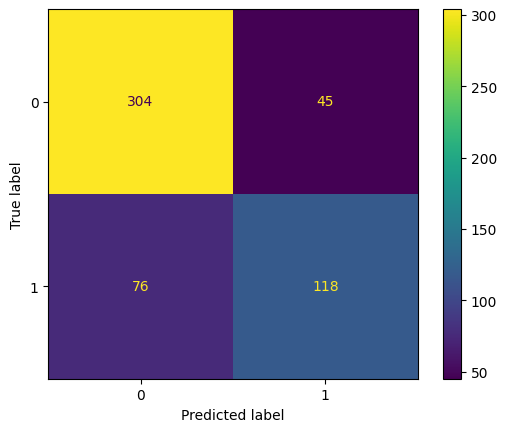

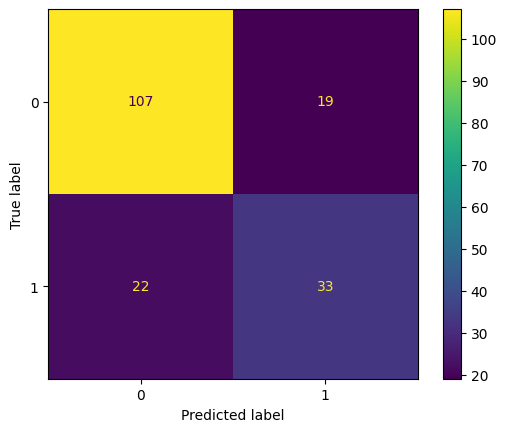

In [19]:
#Logistic Regression
lg = LogisticRegression()
model_assess(lg, X_train_scaled, y_train, X_test_scaled, y_test, 'Logistic Regression')

#### Hyperparameter Tuning LR

Hyperparameter tuning allows data scientists to tweak model performance for optimal results. This process is an essential part of machine learning, and choosing appropriate hyperparameter values is crucial for success.

- https://aws.amazon.com/what-is/hyperparameter-tuning/#:~:text=Hyperparameter%20tuning%20allows%20data%20scientists,the%20model%20as%20a%20hyperparameter.

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Tentukan hyperparameters yang akan di-tuning
hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# Inisialisasi model
logreg = LogisticRegression()

# Inisialisasi RandomizedSearchCV
randomized_lg = RandomizedSearchCV(logreg, hyperparameters, cv=5, n_iter=20, random_state=42, n_jobs=-1)

# Fit model dengan RandomizedSearchCV
randomized_lg.fit(X_train_scaled, y_train)

# Cetak hyperparameters terbaik
print("Best Hyperparameters: ", randomized_lg.best_params_)

Best Hyperparameters:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


                    Logistic Regression_best 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       349
           1       0.73      0.60      0.66       194

    accuracy                           0.78       543
   macro avg       0.77      0.74      0.75       543
weighted avg       0.77      0.78      0.77       543

                    Logistic Regression_best 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       126
           1       0.65      0.60      0.62        55

    accuracy                           0.78       181
   macro avg       0.74      0.73      0.73       181
weighted avg       0.77      0.78      0.78       181

ROC AUC:  0.8203463203463203
Brier Score:  0.22099447513812154


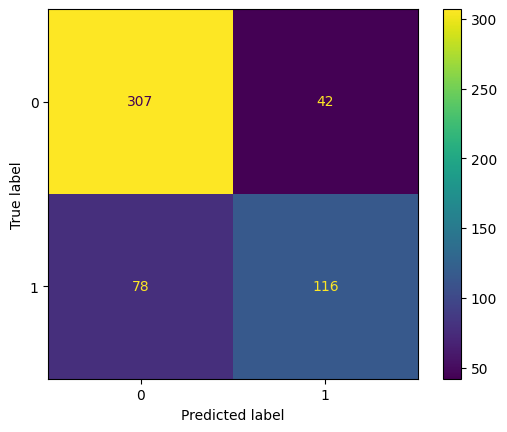

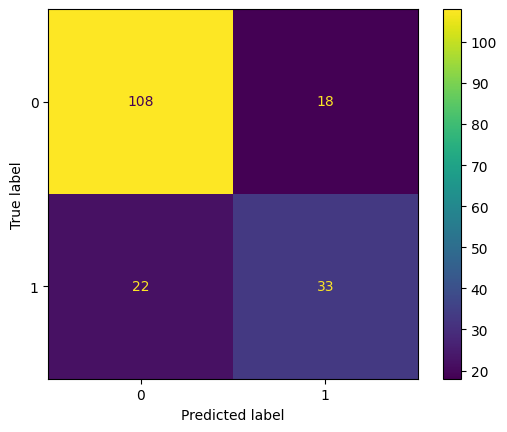

In [24]:
#Logistic Regression
lg_best = LogisticRegression(solver='liblinear', penalty='l1', C=0.1)
model_assess(lg_best, X_train_scaled, y_train, X_test_scaled, y_test, 'Logistic Regression_best')

#### Boostrap Logistic Regression

Bootstrapping is used to evaluate the extent to which the performance of a classification model is stable and measure uncertainty in performance estimates. This can be especially useful when the available dataset is limited and you want to get a more reliable estimate of the distribution of model performance.

In [25]:
# Jumlah bootstrap yang ingin dilakukan
n_bootstrap = 500

# Inisialisasi list untuk menyimpan skor akurasi dari bootstrap
bootstrap_scores = []

# Inisialisasi model
lg_best = LogisticRegression(solver='liblinear', penalty='l1', C=0.1)

for _ in range(n_bootstrap):
# Buat sampel Bootstrap (resampling) dari data pelatihan
    n_samples = len(X_train_scaled)
    bootstrap_indices = np.random.choice(n_samples, n_samples, replace=True)
    #Dalam langkah ini, kita menggunakan iloc untuk mengakses baris data y_train sesuai dengan indeks yang dihasilkan oleh Bootstrap.
    X_train_bootstrap = X_train_scaled.iloc[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]

    # Latih model pada sampel Bootstrap
    lg_best.fit(X_train_bootstrap, y_train_bootstrap)

    # Melakukan prediksi pada data asli
    y_pred = lg_best.predict(X_test_scaled)

    # Menghitung akurasi pada data asli
    accuracy = accuracy_score(y_test, y_pred)
    bootstrap_scores.append(accuracy)

# Hitung statistik summary (opsional)
mean_accuracy = np.mean(bootstrap_scores)
confidence_interval = np.percentile(bootstrap_scores, [2.5, 97.5])

print(f"Rata-rata akurasi: {mean_accuracy}")
print(f"Interval kepercayaan (95%): {confidence_interval}")

Rata-rata akurasi: 0.770950276243094
Interval kepercayaan (95%): [0.74848066 0.79005525]


## Decision Tree

                    DecisionTree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       194

    accuracy                           1.00       543
   macro avg       1.00      1.00      1.00       543
weighted avg       1.00      1.00      1.00       543

                    DecisionTree 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.61      0.62      0.61        55

    accuracy                           0.76       181
   macro avg       0.72      0.72      0.72       181
weighted avg       0.76      0.76      0.76       181

ROC AUC:  0.7217893217893218
Brier Score:  0.23756906077348067


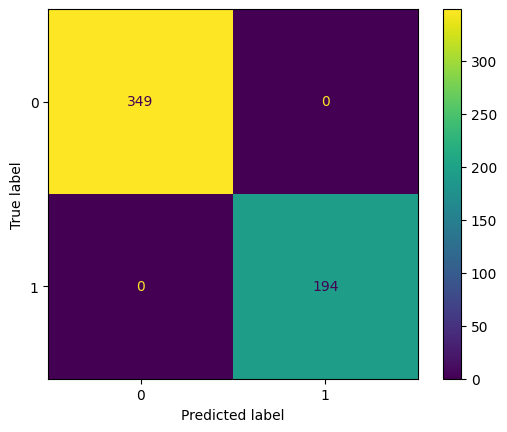

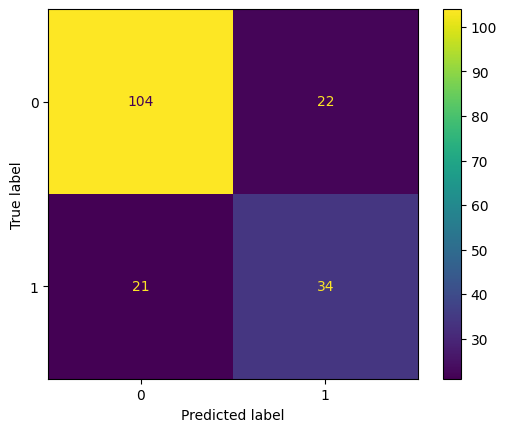

In [26]:
dec_tree = DecisionTreeClassifier()
model_assess(dec_tree, X_train_scaled, y_train, X_test_scaled, y_test, 'DecisionTree')

## Random Forest

                    Random Forest 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       194

    accuracy                           1.00       543
   macro avg       1.00      1.00      1.00       543
weighted avg       1.00      1.00      1.00       543

                    Random Forest 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       126
           1       0.65      0.67      0.66        55

    accuracy                           0.79       181
   macro avg       0.75      0.76      0.75       181
weighted avg       0.79      0.79      0.79       181

ROC AUC:  0.8365800865800865
Brier Score:  0.20994475138121546


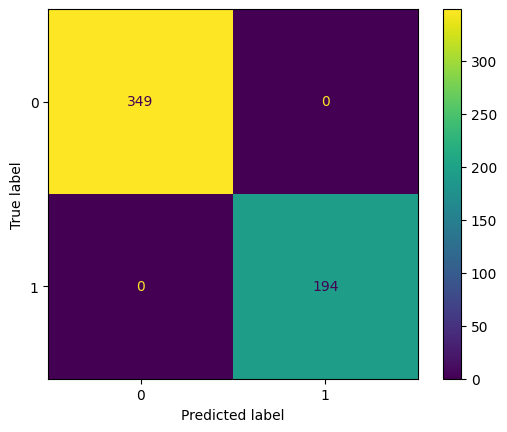

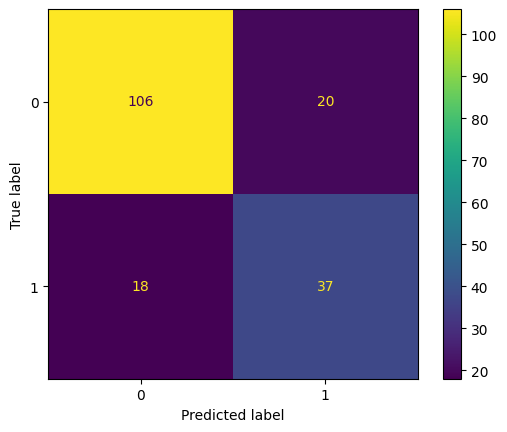

In [27]:
# Create a random forest classifier
rf = RandomForestClassifier()
model_assess(rf, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest')

#### Hyperparameter Tuning RF

In [28]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Daftar hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Inisialisasi Grid Search dengan cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Jalankan Grid Search pada data pelatihan
grid_search.fit(X_train_scaled, y_train)

# Hasil hyperparameter terbaik
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Hyperparameter terbaik:", best_params)
print("Akurasi terbaik:", best_accuracy)

Hyperparameter terbaik: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Akurasi terbaik: 0.7587495752633368


                    Random Forest 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       349
           1       0.99      0.99      0.99       194

    accuracy                           0.99       543
   macro avg       0.99      0.99      0.99       543
weighted avg       0.99      0.99      0.99       543

                    Random Forest 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       126
           1       0.62      0.69      0.66        55

    accuracy                           0.78       181
   macro avg       0.74      0.75      0.75       181
weighted avg       0.79      0.78      0.78       181

ROC AUC:  0.8402597402597404
Brier Score:  0.22099447513812154


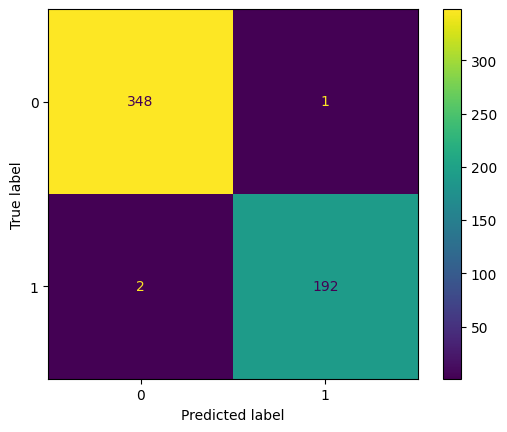

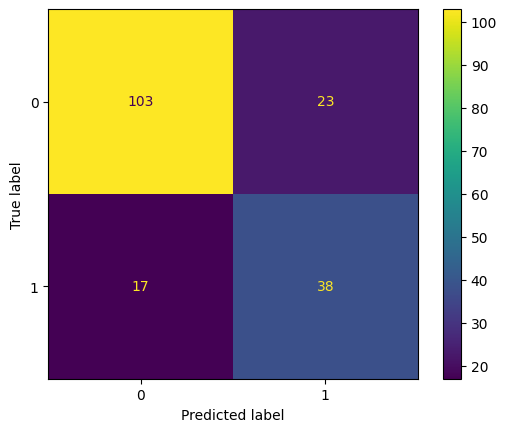

In [29]:
# Create a random forest classifier
rf = RandomForestClassifier(
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200
)
model_assess(rf, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest')

                    Random Forest 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       349
           1       0.94      0.85      0.89       194

    accuracy                           0.93       543
   macro avg       0.93      0.91      0.92       543
weighted avg       0.93      0.93      0.93       543

                    Random Forest 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       126
           1       0.63      0.65      0.64        55

    accuracy                           0.78       181
   macro avg       0.74      0.74      0.74       181
weighted avg       0.78      0.78      0.78       181

ROC AUC:  0.8318903318903319
Brier Score:  0.22099447513812154


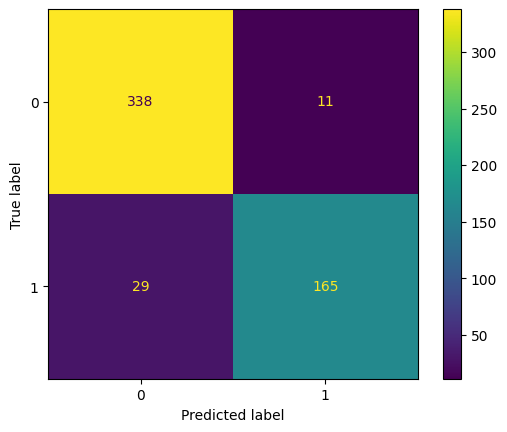

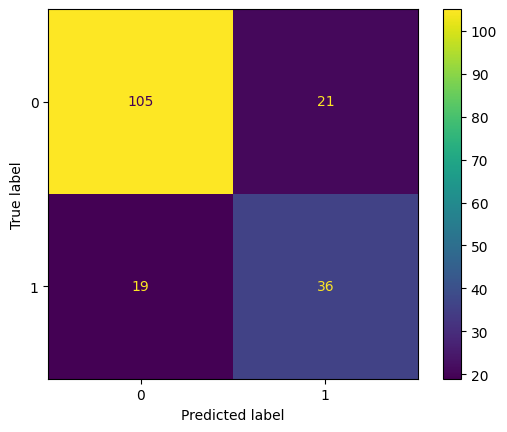

In [46]:
# Create a random forest classifier
rf = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=50
)
model_assess(rf, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest')

#### Boostrap Random Forest

In [47]:
# Jumlah bootstrap yang ingin dilakukan
n_bootstrap = 500

# Inisialisasi list untuk menyimpan skor akurasi dari bootstrap
bootstrap_scores = []

# Inisialisasi model
model = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=50
)

for _ in range(n_bootstrap):
# Buat sampel Bootstrap (resampling) dari data pelatihan
    n_samples = len(X_train_scaled)
    bootstrap_indices = np.random.choice(n_samples, n_samples, replace=True)
    #Dalam langkah ini, kita menggunakan iloc untuk mengakses baris data y_train sesuai dengan indeks yang dihasilkan oleh Bootstrap.
    X_train_bootstrap = X_train_scaled.iloc[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]

    # Latih model pada sampel Bootstrap
    model.fit(X_train_bootstrap, y_train_bootstrap)

    # Melakukan prediksi pada data asli
    y_pred = model.predict(X_test_scaled)

    # Menghitung akurasi pada data asli
    accuracy = accuracy_score(y_test, y_pred)
    bootstrap_scores.append(accuracy)

# Hitung statistik summary (opsional)
mean_accuracy = np.mean(bootstrap_scores)
confidence_interval = np.percentile(bootstrap_scores, [2.5, 97.5])

print(f"Rata-rata akurasi: {mean_accuracy}")
print(f"Interval kepercayaan (95%): {confidence_interval}")

Rata-rata akurasi: 0.7708287292817679
Interval kepercayaan (95%): [0.74033149 0.80662983]


## Naive Bayes

                    Naive Bayes 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       349
           1       0.66      0.60      0.63       194

    accuracy                           0.75       543
   macro avg       0.73      0.72      0.72       543
weighted avg       0.75      0.75      0.75       543

                    Naive Bayes 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       126
           1       0.56      0.58      0.57        55

    accuracy                           0.73       181
   macro avg       0.69      0.69      0.69       181
weighted avg       0.74      0.73      0.74       181

ROC AUC:  0.7858585858585859
Brier Score:  0.26519337016574585


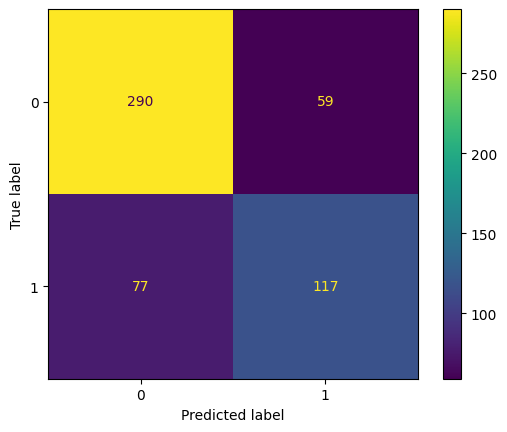

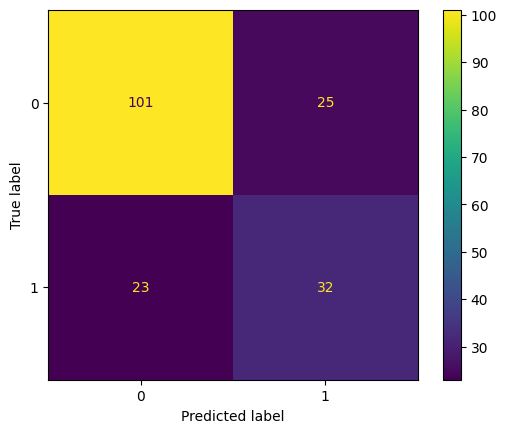

In [62]:
gnb = GaussianNB()
model_assess(gnb, X_train_scaled, y_train, X_test_scaled, y_test, 'Naive Bayes')

In [37]:
# For Gaussian Naive Bayes
gnb = GaussianNB()
gnb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gnb_grid = GridSearchCV(gnb, gnb_params, cv=5, scoring='accuracy')
gnb_grid.fit(X_train_scaled, y_train)
print("Best parameters for GaussianNB:", gnb_grid.best_params_)

Best parameters for GaussianNB: {'var_smoothing': 1e-09}


                    Naive Bayes 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       349
           1       0.66      0.60      0.63       194

    accuracy                           0.75       543
   macro avg       0.73      0.72      0.72       543
weighted avg       0.75      0.75      0.75       543

                    Naive Bayes 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       126
           1       0.56      0.58      0.57        55

    accuracy                           0.73       181
   macro avg       0.69      0.69      0.69       181
weighted avg       0.74      0.73      0.74       181

ROC AUC:  0.7858585858585859
Brier Score:  0.26519337016574585


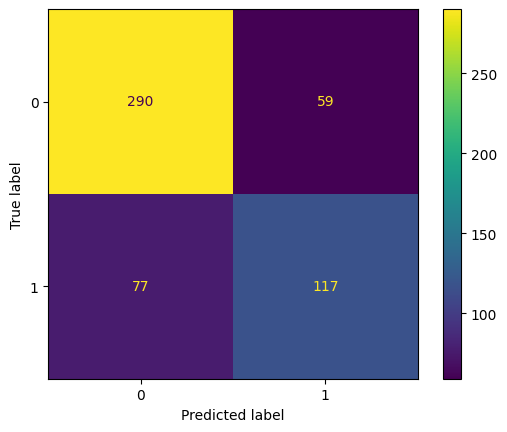

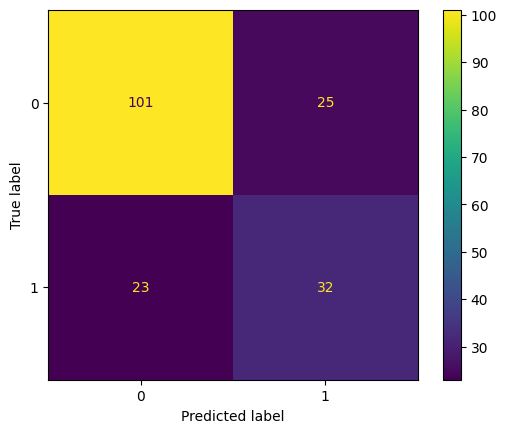

In [38]:
gnb = GaussianNB(var_smoothing= 1e-09)
model_assess(gnb, X_train_scaled, y_train, X_test_scaled, y_test, 'Naive Bayes')

## KNN

                    KNN 
               precision    recall  f1-score   support

           0       0.86      0.91      0.89       349
           1       0.83      0.74      0.78       194

    accuracy                           0.85       543
   macro avg       0.84      0.83      0.83       543
weighted avg       0.85      0.85      0.85       543

                    KNN 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       126
           1       0.60      0.62      0.61        55

    accuracy                           0.76       181
   macro avg       0.71      0.72      0.72       181
weighted avg       0.76      0.76      0.76       181

ROC AUC:  0.783982683982684
Brier Score:  0.2430939226519337


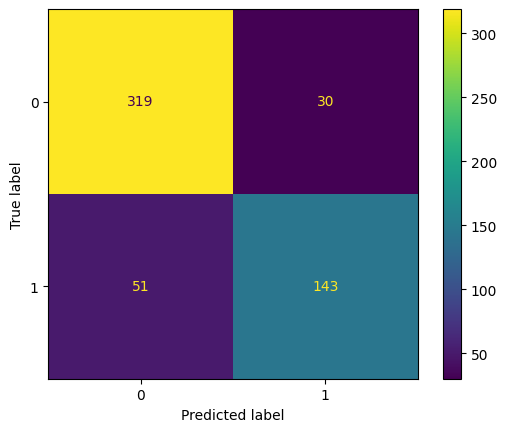

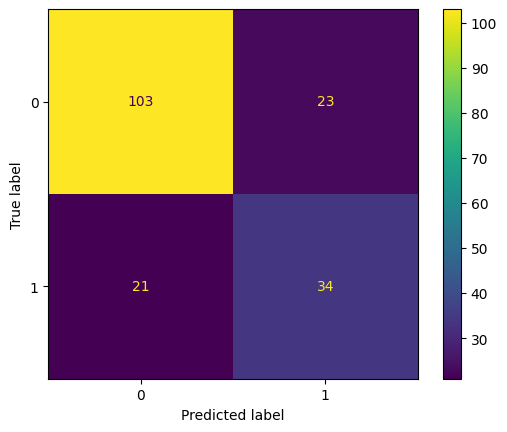

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
model_assess(knn, X_train_scaled, y_train, X_test_scaled, y_test, 'KNN')

In [55]:
# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Daftar hyperparameter yang akan diuji
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
}

# Inisialisasi Grid Search dengan cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Jalankan Grid Search pada data pelatihan
grid_search.fit(X_train_scaled, y_train)

# Hasil hyperparameter terbaik
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Hyperparameter terbaik:", best_params)
print("Akurasi terbaik:", best_accuracy)

Hyperparameter terbaik: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Akurasi terbaik: 0.7421678559293239


                    KNN 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       194

    accuracy                           1.00       543
   macro avg       1.00      1.00      1.00       543
weighted avg       1.00      1.00      1.00       543

                    KNN 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       126
           1       0.60      0.64      0.62        55

    accuracy                           0.76       181
   macro avg       0.72      0.73      0.72       181
weighted avg       0.77      0.76      0.76       181

ROC AUC:  0.7956709956709956
Brier Score:  0.23756906077348067


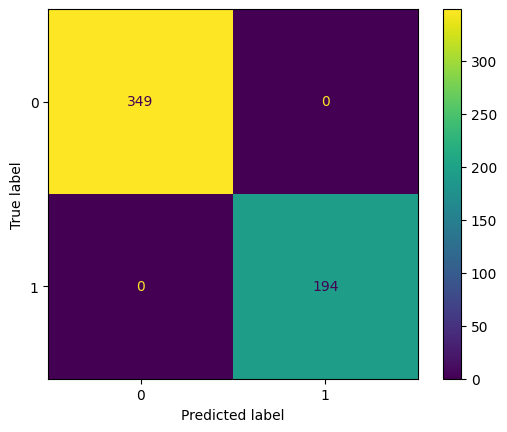

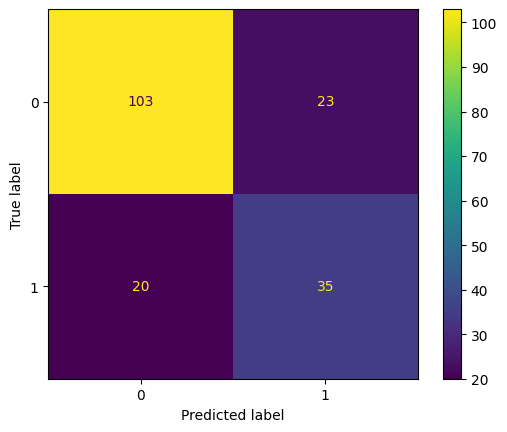

In [57]:
knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 9, p= 2, weights= 'distance')
model_assess(knn, X_train_scaled, y_train, X_test_scaled, y_test, 'KNN')

## Feature Importances

In machine learning, feature importance scores are used to determine the relative importance of each feature in a dataset when building a predictive model. Feature importance can provide a way to rank the features based on their contribution to the final prediction.
- https://www.aporia.com/learn/feature-importance/feature-importance-7-methods-and-a-quick-tutorial/#:~:text=What%20Is%20Feature%20Importance%3F,linear%20models%2C%20and%20neural%20networks.

In [43]:
# Get the coefficients and feature names
coefficients = lg_best.coef_[0]
feature_names = X_train.columns  # Replace with your actual feature names

# Create a list of (feature, coefficient) pairs
feature_importance = [(feature, coef) for feature, coef in zip(feature_names, coefficients)]

# Sort the features by absolute coefficient value (importance)
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the top N most important features
top_n = 10  # Adjust this value as needed
for feature, coef in feature_importance[:top_n]:
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: Glucose, Coefficient: 0.9361437512982258
Feature: BMI, Coefficient: 0.5374078995135945
Feature: DiabetesPedigreeFunction, Coefficient: 0.37696933729906995
Feature: Pregnancies, Coefficient: 0.3378754884007724
Feature: Age, Coefficient: 0.2545671092054774
Feature: SkinThickness, Coefficient: 0.1233609293539829
Feature: Insulin, Coefficient: 0.07329023672413638
Feature: BloodPressure, Coefficient: -0.0722275416673972


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

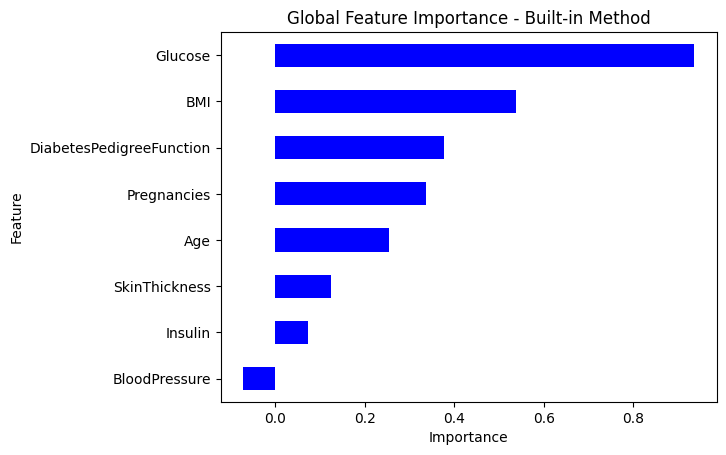

In [45]:
global_importances = pd.Series(lg_best.coef_[0], index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

Text(0.5, 1.0, 'Logistic Regression')

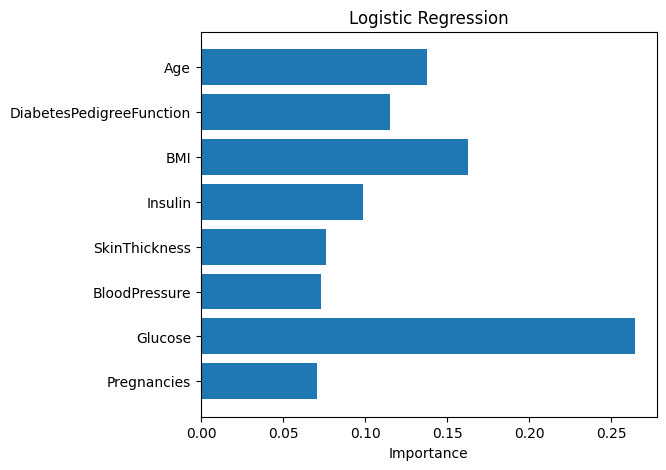

In [41]:
rf_importance = rf.feature_importances_

# Nama-nama fitur (pada contoh ini, iris dataset)
feature_names = X_train.columns

# Visualisasi fitur importance dengan grafik batang
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.barh(feature_names, rf_importance)
plt.xlabel('Importance')
plt.title('Logistic Regression')

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

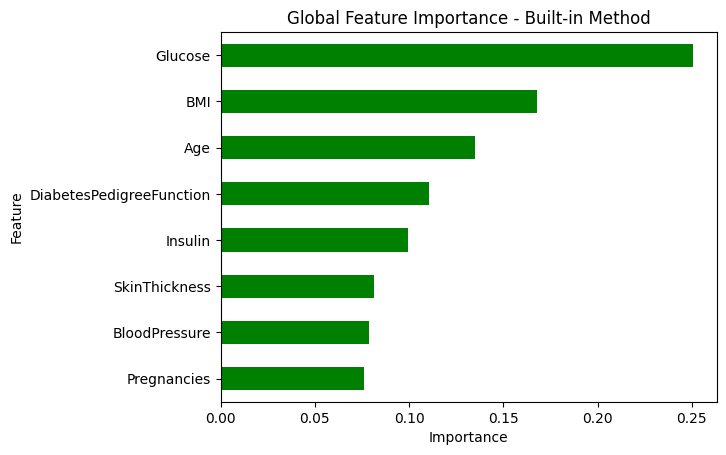

In [217]:
global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

According to WHO, the standard ideal weight categories for adult men and women based on **BMI** are as follows:

- Less than 18.5 means underweight.
- Between 18.5 - 24.9 means normal body weight
- Between 25-29.9 means overweight.
- Above 30 means obesity

**Blood Pressure** normal dewasa?
- https://www.nhs.uk/common-health-questions/lifestyle/what-is-blood-pressure/#:~:text=As%20a%20general%20guide%3A,to%20be%20below%2090%2F60mmHg
- https://www.honestdocs.id/tekanan-darah-sistolik-dan-diastolik
- https://www.nhs.uk/common-health-questions/lifestyle/what-is-blood-pressure/

Diastolic blood pressure
- Normal blood pressure ranges from 60-80 mmHg
- A person is considered hypertensive if their blood pressure is 80 or more.
- A person is considered hypotensive if their blood pressure is less than 60